In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 03 Preprocessing

## 3-1 encoding
머신러닝은 숫자로 돌아간다. 데이터 문자열을 숫자로 바꿔야한다.

In [5]:
# pandas의 map이라는 method를 사용
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [6]:
# 1단계 원하는 mapping (관계식 같은 거)을 정의
## male이면 0, female이면 1
mapping = {'male':0, 'female':1}


In [7]:
# 2단계 map 메소드 사용한 결과를 df['Sex']에 재할당
df['Sex'] = df['Sex'].map(mapping)

## 3-2 필요하지 않은 (=생존 여부 알아내는 데 그닥 도움이 되지 않는 / 머신러닝 모델에 안 넣을) 칼럼 삭제

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
## pandas의 drop이라는 method를 사용
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
# axis =1로 하면 column이 날아감
# inplace = True로 하면 df에 바로 적용이 됨

In [11]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


## 3-3 Imputation(빈 값 채워넣기)

In [14]:
df.isnull() #Nan인 (빈 값인) element가 누군지 보여준다. True면 Nan이라는 뜻

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


<Axes: >

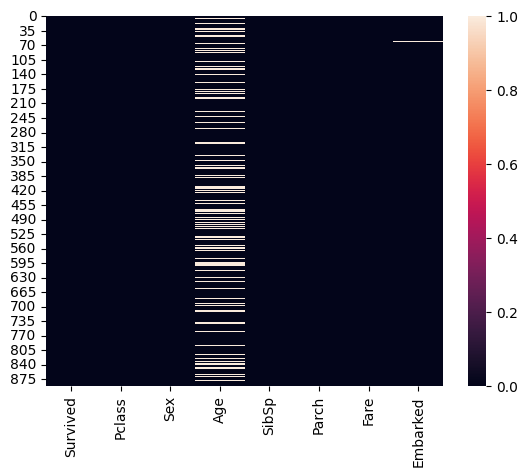

In [13]:
sns.heatmap(df.isnull())

### (1) age는 숫자니까 median값으로 채워보자

In [15]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [17]:
df['Age'].mode()[0]

np.float64(24.0)

In [19]:
# pandas의 fillna()라는 method로 imputation을 해보자!
df['Age'].fillna(df['Age'].mode()[0])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [20]:
#위에서 만든 원래 COLUMN을 채워진 pandas Series로 대체
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

<Axes: >

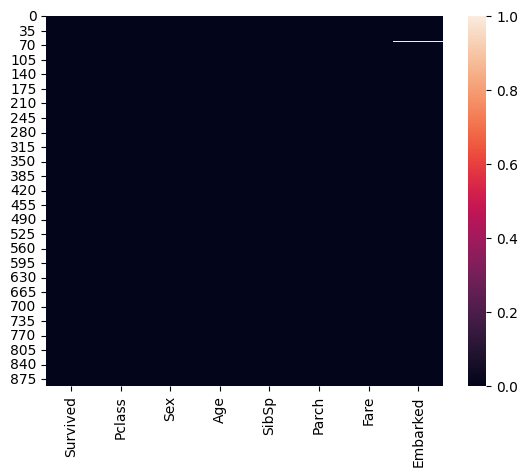

In [21]:
sns.heatmap(df.isnull())

### (2) Embarked는 문자니까 얘도 median으로 채울 수 있다.

In [22]:
df['Embarked'].mode()[0]

'S'

In [24]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: >

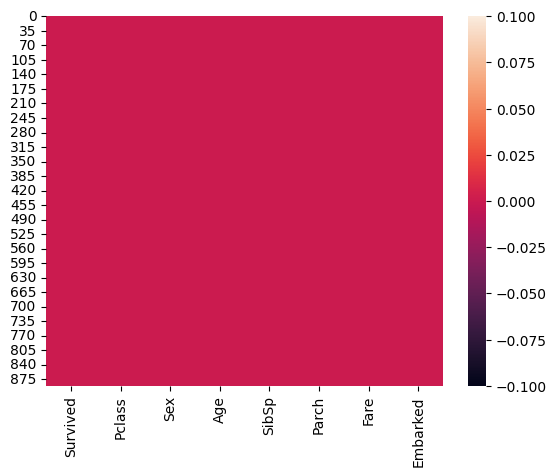

In [26]:
sns.heatmap(df.isnull()) # 모든 값이 False(Nan이 없다)

In [27]:
df['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [28]:
df.tail(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,0,27.0,0,0,13.00,S
887,1,1,1,19.0,0,0,30.00,S
888,0,3,1,24.0,1,2,23.45,S
889,1,1,0,26.0,0,0,30.00,C
890,0,3,0,32.0,0,0,7.75,Q


In [29]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [30]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
5,0,3,0,24.0,0,0,8.4583,Q
6,0,1,0,54.0,0,0,51.8625,S
7,0,3,0,2.0,3,1,21.0750,S
8,1,3,1,27.0,0,2,11.1333,S
9,1,2,1,14.0,1,0,30.0708,C


In [31]:
# 1단계 원하는 mapping (관계식 같은 거)을 정의
## S이면 0, C이면 1, Q이면 2
mapping = {'S':0, 'C':1, 'Q':2}

In [32]:
# 2단계 map 메소드 사용한 결과를 df['Embarked']에 재할당
df['Embarked'] = df['Embarked'].map(mapping)

In [33]:
df['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

### 개수 알아보기

In [35]:
set(list(df['Embarked'])) # 중복되는 요소가 삭제(종류가 뭔지 알 수 있다.)

{0, 1, 2}

## 3-4 Outlier Removal

### (1) skewness(데이터가 치우친 정도를 확인)
skewness는 -1과 1 사이에 있어야 한다. 이 범위를 벗어나면 outlier가 있다.

In [38]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [39]:
df['Age'].skew()

np.float64(0.6577529069911331)

In [42]:
len(df.columns)

8

In [46]:
df.columns[0]

'Survived'

In [51]:
for col in df.columns:
    print(f'skewness of {col} is {df[col].skew()}')

skewness of Survived is 0.4785234382949897
skewness of Pclass is -0.6305479068752845
skewness of Sex is 0.6189208484871982
skewness of Age is 0.6577529069911331
skewness of SibSp is 3.6953517271630565
skewness of Parch is 2.7491170471010933
skewness of Fare is 4.787316519674893
skewness of Embarked is 1.5433970935309407


### (2) Visualization for Fare column
outlier 볼 때는 boxplot

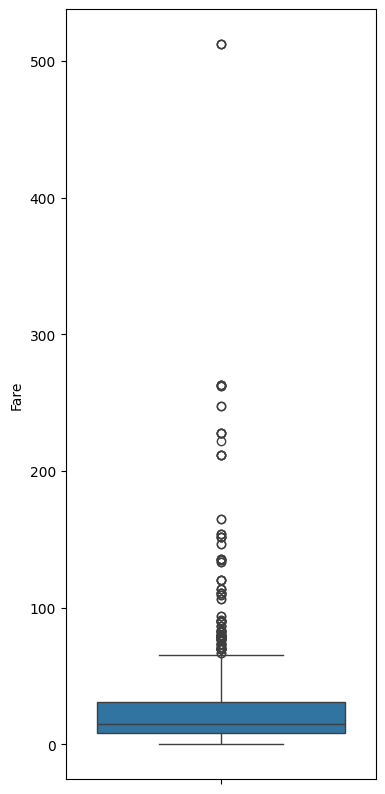

In [52]:
plt.figure(figsize = (4,10))
sns.boxplot(df['Fare'])
plt.show()

### (3) outlier removal through quantile

In [53]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [55]:
whisker_width = 1.5
lower_whisker = Q1-whisker_width*IQR
upper_whisker = Q3+whisker_width*IQR

In [58]:
# lower_whisker보다 작거나 upper_whisker보다 큰 애들은 outlier

In [59]:
df['Fare'] < lower_whisker # 여기서 True로 뜨는 애들이 outlier

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [60]:
df['Fare'] > upper_whisker # 여기서 True로 뜨는 애들이 outlier

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [61]:
## outlier = lower_whisker보다 작은 데이터와 upper_width보다 큰 데이터의 '합집합'
(df['Fare'] < lower_whisker) | (df['Fare'] > upper_whisker)

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [63]:
df[(df['Fare'] < lower_whisker) | (df['Fare'] > upper_whisker)] # 위에서 True로 잡힌 data만 filtering

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,1
27,0,1,0,19.0,3,2,263.0000,0
31,1,1,1,24.0,1,0,146.5208,1
34,0,1,0,28.0,1,0,82.1708,1
52,1,1,1,49.0,1,0,76.7292,1
...,...,...,...,...,...,...,...,...
846,0,3,0,24.0,8,2,69.5500,0
849,1,1,1,24.0,1,0,89.1042,1
856,1,1,1,45.0,1,1,164.8667,0
863,0,3,1,24.0,8,2,69.5500,0


In [64]:
df['Fare'] > lower_whisker

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Fare, Length: 891, dtype: bool

In [65]:
df['Fare'] < upper_whisker

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Fare, Length: 891, dtype: bool

In [66]:
(df['Fare'] > lower_whisker) | (df['Fare'] < upper_whisker)

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Fare, Length: 891, dtype: bool

In [69]:
df[(df['Fare'] > lower_whisker) & (df['Fare'] < upper_whisker)] #교집합!!!!!!!!!

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,24.0,0,0,8.4583,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,24.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [70]:
## index 재정렬
df = df[(df['Fare'] > lower_whisker) & (df['Fare'] < upper_whisker)]

In [71]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,24.0,0,0,8.4583,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,24.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [77]:
df = df.reset_index() # reset_index는 index를 초기화하는 pandas method

In [78]:
df

,level_0,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,3,0,22.0,1,0,7.2500,0
1,1,2,1,3,1,26.0,0,0,7.9250,0
2,2,3,1,1,1,35.0,1,0,53.1000,0
3,3,4,0,3,0,35.0,0,0,8.0500,0
4,4,5,0,3,0,24.0,0,0,8.4583,2
...,...,...,...,...,...,...,...,...,...,...
770,770,886,0,2,0,27.0,0,0,13.0000,0
771,771,887,1,1,1,19.0,0,0,30.0000,0
772,772,888,0,3,1,24.0,1,2,23.4500,0
773,773,889,1,1,0,26.0,0,0,30.0000,1


In [81]:
# index라는 새로운 column 없애기
# iloc = index location의 줄임말 [행,열]
df = df.iloc[:, 1:]

In [82]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,3,1,26.0,0,0,7.9250,0
2,1,1,1,35.0,1,0,53.1000,0
3,0,3,0,35.0,0,0,8.0500,0
4,0,3,0,24.0,0,0,8.4583,2
...,...,...,...,...,...,...,...,...
770,0,2,0,27.0,0,0,13.0000,0
771,1,1,1,19.0,0,0,30.0000,0
772,0,3,1,24.0,1,2,23.4500,0
773,1,1,0,26.0,0,0,30.0000,1


In [86]:
for col in df.columns:
    print(f'skewness of {col} is {df[col].skew()}')

skewness of Survived is 0.6798738387603496
skewness of Pclass is -1.0295968890475515
skewness of Sex is 0.7988800220538848
skewness of Age is 0.6845730984053457
skewness of SibSp is 2.7906891466584316
skewness of Parch is 3.145570664583091
skewness of Fare is 1.4306715336945985
skewness of Embarked is 1.6700813097966696


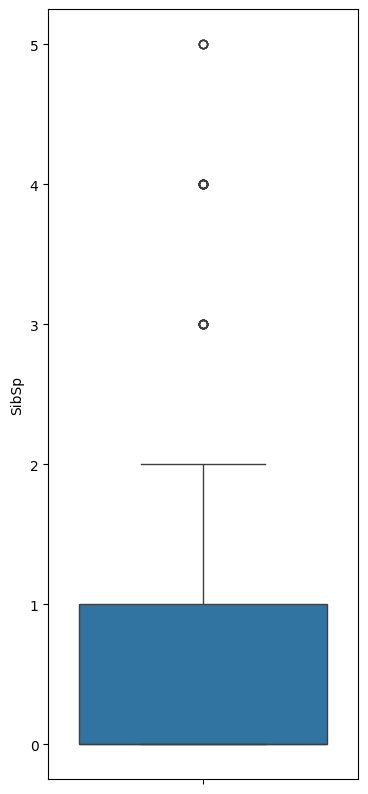

In [87]:
plt.figure(figsize = (4,10))
sns.boxplot(df['SibSp'])
plt.show()

In [90]:
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3 - Q1

In [91]:
whisker_width = 1.5
lower_whisker = Q1-whisker_width*IQR
upper_whisker = Q3+whisker_width*IQR

In [93]:
df[(df['SibSp']<lower_whisker) | (df['SibSp']>upper_whisker)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,0,3,0,2.0,3,1,21.0750,0
15,0,3,0,2.0,4,1,29.1250,2
23,0,3,1,8.0,3,1,21.0750,0
46,0,3,0,7.0,4,1,39.6875,0
54,0,3,0,11.0,5,2,46.9000,0
56,0,3,0,4.0,3,2,27.9000,0
61,1,3,1,17.0,4,2,7.9250,0
64,0,3,1,16.0,5,2,46.9000,0
77,1,3,1,33.0,3,0,15.8500,0
108,0,3,1,2.0,4,2,31.2750,0


In [94]:
df = df[(df['SibSp']>lower_whisker) & (df['SibSp']<upper_whisker)]

In [95]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,3,1,26.0,0,0,7.9250,0
2,1,1,1,35.0,1,0,53.1000,0
3,0,3,0,35.0,0,0,8.0500,0
4,0,3,0,24.0,0,0,8.4583,2
...,...,...,...,...,...,...,...,...
770,0,2,0,27.0,0,0,13.0000,0
771,1,1,1,19.0,0,0,30.0000,0
772,0,3,1,24.0,1,2,23.4500,0
773,1,1,0,26.0,0,0,30.0000,1


In [96]:
df = df.reset_index()

In [97]:
df

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,0,22.0,1,0,7.2500,0
1,1,1,3,1,26.0,0,0,7.9250,0
2,2,1,1,1,35.0,1,0,53.1000,0
3,3,0,3,0,35.0,0,0,8.0500,0
4,4,0,3,0,24.0,0,0,8.4583,2
...,...,...,...,...,...,...,...,...,...
734,770,0,2,0,27.0,0,0,13.0000,0
735,771,1,1,1,19.0,0,0,30.0000,0
736,772,0,3,1,24.0,1,2,23.4500,0
737,773,1,1,0,26.0,0,0,30.0000,1


In [98]:
df = df.iloc[:, 1:]

In [99]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,3,1,26.0,0,0,7.9250,0
2,1,1,1,35.0,1,0,53.1000,0
3,0,3,0,35.0,0,0,8.0500,0
4,0,3,0,24.0,0,0,8.4583,2
...,...,...,...,...,...,...,...,...
734,0,2,0,27.0,0,0,13.0000,0
735,1,1,1,19.0,0,0,30.0000,0
736,0,3,1,24.0,1,2,23.4500,0
737,1,1,0,26.0,0,0,30.0000,1


In [100]:
for col in df.columns:
    print(f'skewness of {col} is {df[col].skew()}')

skewness of Survived is 0.6343155880339343
skewness of Pclass is -0.9620125722149317
skewness of Sex is 0.8307904089922213
skewness of Age is 0.8038723194295765
skewness of SibSp is 1.6505308145563993
skewness of Parch is 3.6811319881684703
skewness of Fare is 1.5825756139139018
skewness of Embarked is 1.637274087852704
